In [24]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [25]:
# ---- Load data
df = pd.read_csv("../../data/LeafRiverDaily.csv")

In [26]:
for col in ["Precipitation", "Temperature", "Streamflow"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [27]:
df = df.dropna(subset=["Precipitation", "Temperature", "Streamflow"]).reset_index(drop=True)

In [ ]:
# ---- Build 90-day history samples
HISTORY = 90

P = df["Precipitation"].to_numpy()
T = df["Temperature"].to_numpy()
Q = df["Streamflow"].to_numpy()

X_list, y_list = [], []

#Extract 90-day history
for i in range(HISTORY, len(df)):
    # Previous 90 days of P and T
    P_hist = P[i-HISTORY:i]
    T_hist = T[i-HISTORY:i]

    # Combine → shape (90,2) → flatten → (180,)
    X_list.append(np.column_stack([P_hist, T_hist]).reshape(-1))

    # Target = streamflow on day 91
    y_list.append(Q[i])

# Convert to Final Arrays
X = np.array(X_list)
y = np.array(y_list)

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (14520, 180)
Target shape: (14520,)


In [29]:
# ---- 80/20 split (time-ordered, no shuffle)
split_idx = int(0.8 * len(X))

X_train = X[:split_idx]
X_test  = X[split_idx:]

y_train = y[:split_idx]
y_test  = y[split_idx:]

In [30]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('linear', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [31]:
# --- Predictions
y_pred = model.predict(X_test)

In [32]:
# --- Evaluation Metrics

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance (Test Set)")
print(f"R²  : {r2:.4f}")
print(f"MAE : {mae:.4f}")


Model Performance (Test Set)
R²  : 0.6227
MAE : 0.9939


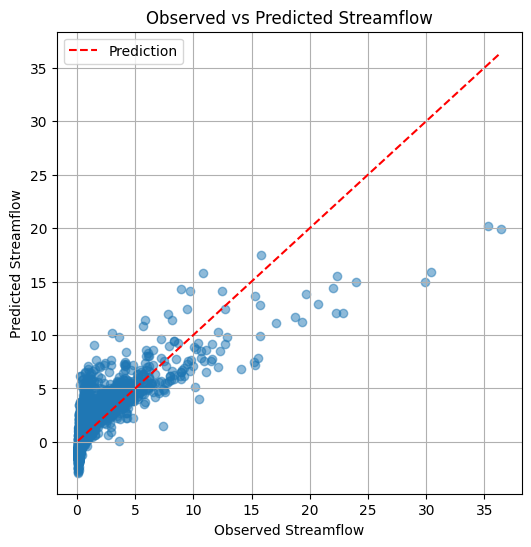

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label="Prediction"
)

plt.xlabel("Observed Streamflow")
plt.ylabel("Predicted Streamflow")
plt.title("Observed vs Predicted Streamflow")
plt.legend()
plt.grid()

plt.show()


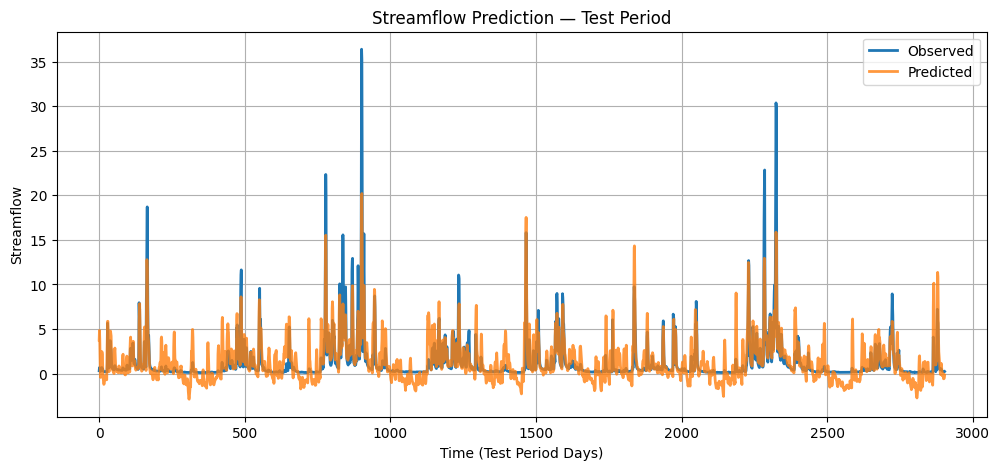

In [34]:
plt.figure(figsize=(12,5))

plt.plot(y_test, label="Observed", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2, alpha=0.8)

plt.xlabel("Time (Test Period Days)")
plt.ylabel("Streamflow")
plt.title("Streamflow Prediction — Test Period")
plt.legend()
plt.grid()

plt.show()
